In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from prettytable import PrettyTable

This function takes a path, fetches and normalizes the data, and then builds a feed dict from it.

In [2]:
def get_normalized_feed_dict(path):
    d = pd.read_csv(path,names=['x','y'])
    m1 = np.max(d['x'])
    x = np.array(d['x'])
    y = np.array(d['y'])
    m2 = np.max(d['y'])
    return m1, m2, {X:(x/m1), Y:(y/m2)}


NameError: name 'X' is not defined

Here, we build the graph nodes. X and Y are input nodes, w and b are variables, and the rest
are nodes used to train the graph.

In [3]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
l_rate=0.001
w = tf.Variable(0.0,name='w')
b = tf.Variable(0.0,name='b')
Y_hat = w * X + b
loss = tf.losses.absolute_difference(Y,Y_hat)
opt = tf.train.GradientDescentOptimizer(l_rate)
train_op = opt.minimize(loss)

Build summary nodes to output data to tensorboard

In [4]:
tf.summary.scalar('loss',loss)
tf.summary.scalar('w',w)
tf.summary.scalar('b',b)
all_summary = tf.summary.merge_all()
filewriter = tf.summary.FileWriter("task1_logs", graph=tf.get_default_graph())

Finally, we actually run the code for each graph, storing the results in a table to be printed later.

In [5]:
table = PrettyTable(field_names=['Path','Min Loss','w','b'])
paths = ['ds1.csv', 'ds2.csv', 'ds3.csv']
for path in paths:
    min_loss = None
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        m1, m2, feed_dict = get_normalized_feed_dict(path)
        for i in range(10000):
            if i % 100 == 0:
                train_loss, _, summ_buf = sess.run([loss,train_op, all_summary], feed_dict=feed_dict)
                filewriter.add_summary(summ_buf,i)
            else:
                train_loss, _ = sess.run([loss,train_op], feed_dict=feed_dict)
                
            if min_loss is None or train_loss<min_loss:
                min_loss = train_loss
        table.add_row([path, min_loss, w.eval(),b.eval()])

As we can see, 'ds2.csv' has the lowest loss, and thus contains the most linear data, 'ds3.csv' coming a distant second. The values of w and b are shown in the table.

In [6]:
print(table)

+---------+---------------+-------------+-------------+
|   Path  |    Min Loss   |      w      |      b      |
+---------+---------------+-------------+-------------+
| ds1.csv |   0.4220467   |   -1.19354  |  0.5567602  |
| ds2.csv | 3.1379615e-05 |  0.98253685 | 0.017237157 |
| ds3.csv |   0.24977364  | 0.035258994 |  0.5299905  |
+---------+---------------+-------------+-------------+


As we can see, the plots show that `ds2.csv` is the most linear.

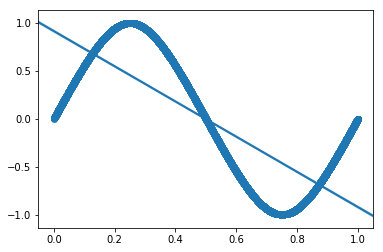

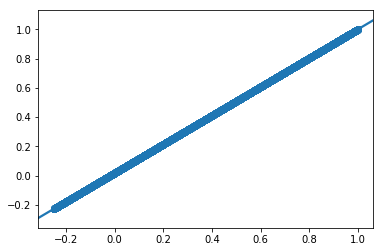

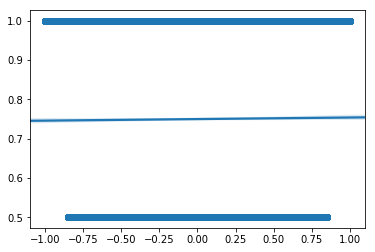

In [8]:
import seaborn as sb
import matplotlib.pyplot as plt
for path in paths:
    d = pd.read_csv(path,names=['x','y'])
    m1 = np.max(d['x'])
    x = np.array(d['x'])
    y = np.array(d['y'])
    m2 = np.max(d['y'])
    sb.regplot((x/m1),(y/m2))
    plt.show()
